In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/IMDB_dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# EDA - Data Inspection
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.describe())

Dataset Shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 review       0
sentiment    0
dtype: int64


In [ ]:
#Data Cleaning (Drop or fill missing values if needed)
df.dropna(inplace=True)  # Assuming simple drop of missing values for simplicity

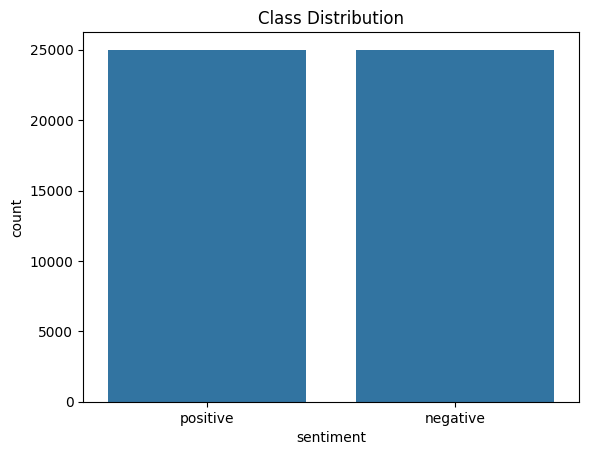

In [ ]:
# Exploratory Analysis - Visualizing Class Distribution
sns.countplot(data=df, x='sentiment')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Text Preprocessing
# Encode the labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  # Assuming 'sentiment' is a column

In [ ]:
# Vectorize Text
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate models and store results
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

In [ ]:
# Define a function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix for {title}")
    plt.show()

#K-Nearest Neighbors (KNN)

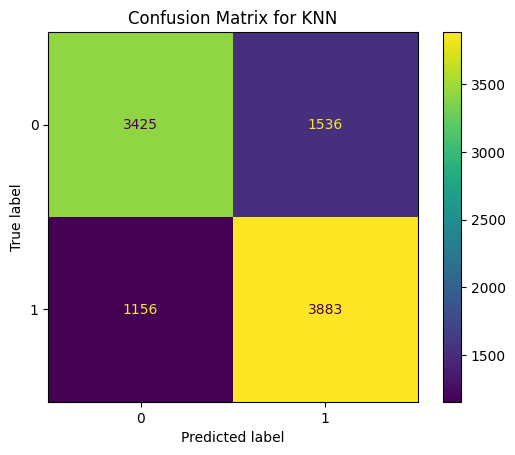

KNN Accuracy: 0.7308


In [ ]:
# Model 1: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
display_confusion_matrix(y_test, y_pred_knn, "KNN")
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

#K-Means

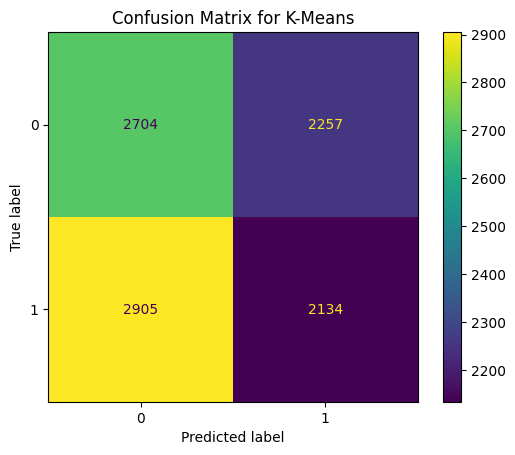

K-Means Accuracy: 0.4838


In [ ]:
# Model 2: K-Means (Unsupervised)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
display_confusion_matrix(y_test, y_pred_kmeans, "K-Means")
print("K-Means Accuracy:", accuracy_score(y_test, y_pred_kmeans))

#Decision Tree

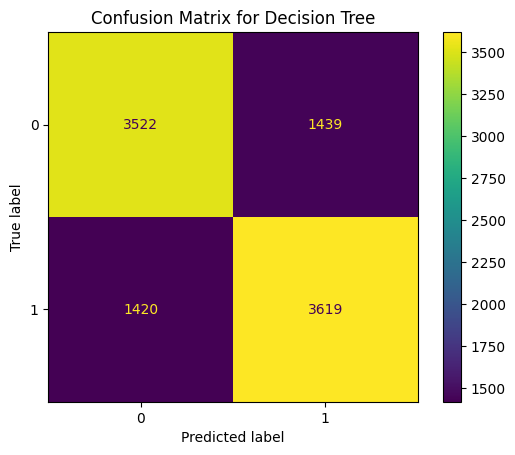

Decision Tree Accuracy: 0.7141


In [ ]:
# Model 3: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

#Random Forest

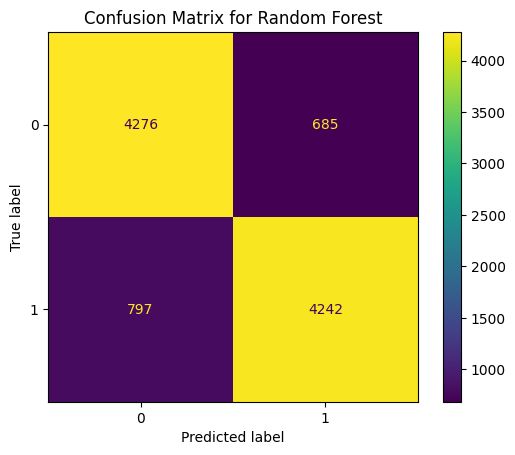

Random Forest Accuracy: 0.8518


In [ ]:
# Model 4: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf, "Random Forest")
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

#Neural Network (Simple MLP)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8407 - loss: 0.3723 - val_accuracy: 0.8895 - val_loss: 0.2643
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9178 - loss: 0.2058 - val_accuracy: 0.8898 - val_loss: 0.2707
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9435 - loss: 0.1489 - val_accuracy: 0.8855 - val_loss: 0.3053
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0607 - val_accuracy: 0.8817 - val_loss: 0.4798
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9973 - loss: 0.0117 - val_accuracy: 0.8813 - val_loss: 0.6188
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.8875 - val_loss: 0.8379
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 2.5418e-04 - val_accuracy: 0.8857 - val_loss: 0.9575
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 7.413

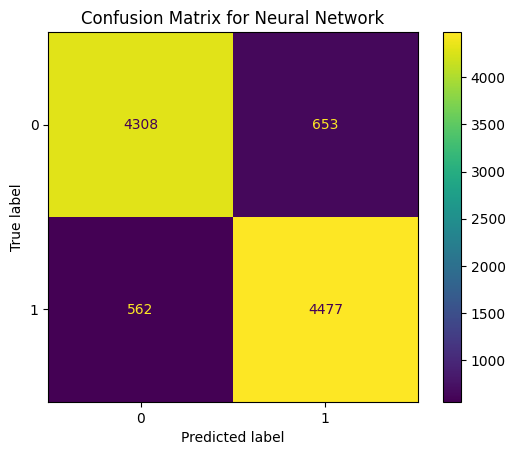

Neural Network Accuracy: 0.8785


In [ ]:
# Model 5: Neural Network (Simple MLP)
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
nn_pred = np.argmax(nn_model.predict(X_test), axis=1)
display_confusion_matrix(y_test, nn_pred, "Neural Network")
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

#Evaluating Models

In [ ]:
# Evaluating models and store results
results = []
results.append(evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors"))
results.append(evaluate_model(y_test, y_pred_kmeans, "K-Means"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, nn_pred, "Neural Network"))

# Create a DataFrame to display results
df = pd.DataFrame(results)

# Print results in tabular format
print("\nEvaluation Results:\n")
print(df)



Evaluation Results:

                 Model  Accuracy  Precision  Recall  F1 Score
0  K-Nearest Neighbors    0.7308   0.731982  0.7308  0.730330
1              K-Means    0.4838   0.484053  0.4838  0.481887
2        Decision Tree    0.7141   0.714095  0.7141  0.714095
3        Random Forest    0.8518   0.852002  0.8518  0.851794
4       Neural Network    0.8785   0.878608  0.8785  0.878481


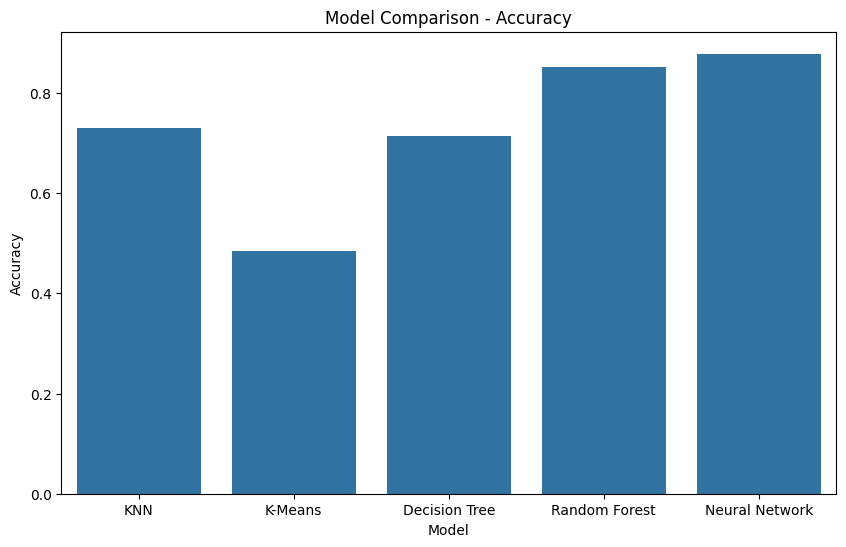

In [ ]:
# Comparing Model Performance - Accuracy
models = ['KNN', 'K-Means', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracies = [accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_kmeans),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, nn_pred)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


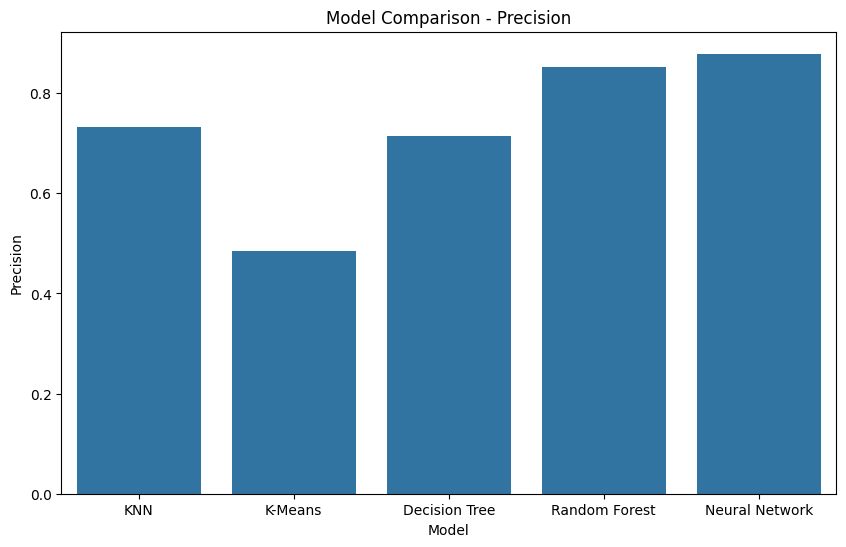

In [ ]:
# Comparing Model Performance - Precision
precisions = [precision_score(y_test, y_pred_knn, average='weighted'),
              precision_score(y_test, y_pred_kmeans, average='weighted'),
              precision_score(y_test, y_pred_dt, average='weighted'),
              precision_score(y_test, y_pred_rf, average='weighted'),
              precision_score(y_test, nn_pred, average='weighted')]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precisions)
plt.title('Model Comparison - Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()


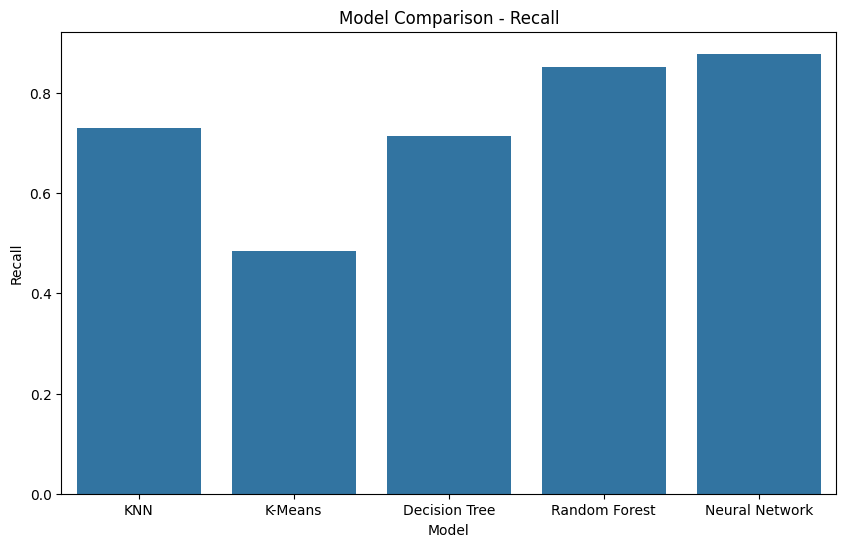

In [ ]:
# Comparing Model Performance - Recall
recalls = [recall_score(y_test, y_pred_knn, average='weighted'),
           recall_score(y_test, y_pred_kmeans, average='weighted'),
           recall_score(y_test, y_pred_dt, average='weighted'),
           recall_score(y_test, y_pred_rf, average='weighted'),
           recall_score(y_test, nn_pred, average='weighted')]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recalls)
plt.title('Model Comparison - Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.show()


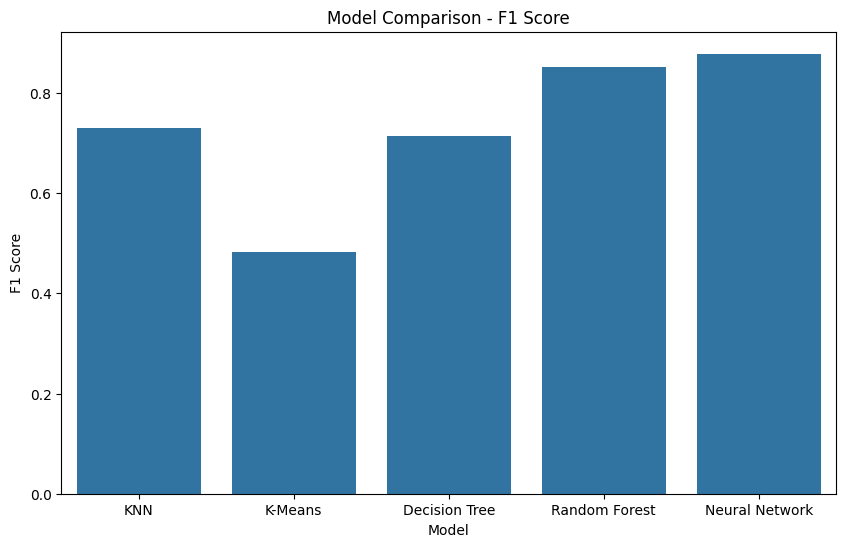

In [ ]:
# Comparing Model Performance - F1 Score
f1_scores = [f1_score(y_test, y_pred_knn, average='weighted'),
             f1_score(y_test, y_pred_kmeans, average='weighted'),
             f1_score(y_test, y_pred_dt, average='weighted'),
             f1_score(y_test, y_pred_rf, average='weighted'),
             f1_score(y_test, nn_pred, average='weighted')]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores)
plt.title('Model Comparison - F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()